In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#!pip install xlrd


[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Kaggle code:

# pd.set_option('display.max_colwidth', None)
# data_dict = pd.read_excel('/kaggle/input/GiveMeSomeCredit/Data Dictionary.xls')
# data_dict

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
pd.set_option('display.max_colwidth', None)
data_dict = pd.read_excel('input/Data Dictionary.xls')
data_dict

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,Variable Name,Description,Type
1,SeriousDlqin2yrs,Person experienced 90 days past due delinquency or worse,Y/N
2,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits,percentage
3,age,Age of borrower in years,integer
4,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days past due but no worse in the last 2 years.,integer
5,DebtRatio,"Monthly debt payments, alimony,living costs divided by monthy gross income",percentage
6,MonthlyIncome,Monthly income,real
7,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards),integer
8,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or more past due.,integer
9,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans including home equity lines of credit,integer


In [28]:
test.head(10)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
5,6,NaN,0.509791,63,0,0.342429,4140.0,4,0,0,0,1.0
6,7,NaN,0.587778,50,0,1048.000000,0.0,5,0,0,0,3.0
7,8,NaN,0.046149,79,1,0.369170,3301.0,8,0,1,0,1.0
8,9,NaN,0.013527,68,0,2024.000000,NaN,4,0,1,0,0.0
9,10,NaN,1.000000,23,98,0.000000,0.0,0,98,0,98,0.0


In [7]:
train = pd.read_csv('input/cs-training.csv')
test = pd.read_csv('input/cs-test.csv')
train.head(10)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [8]:
!pip install missingno


[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<Axes: >

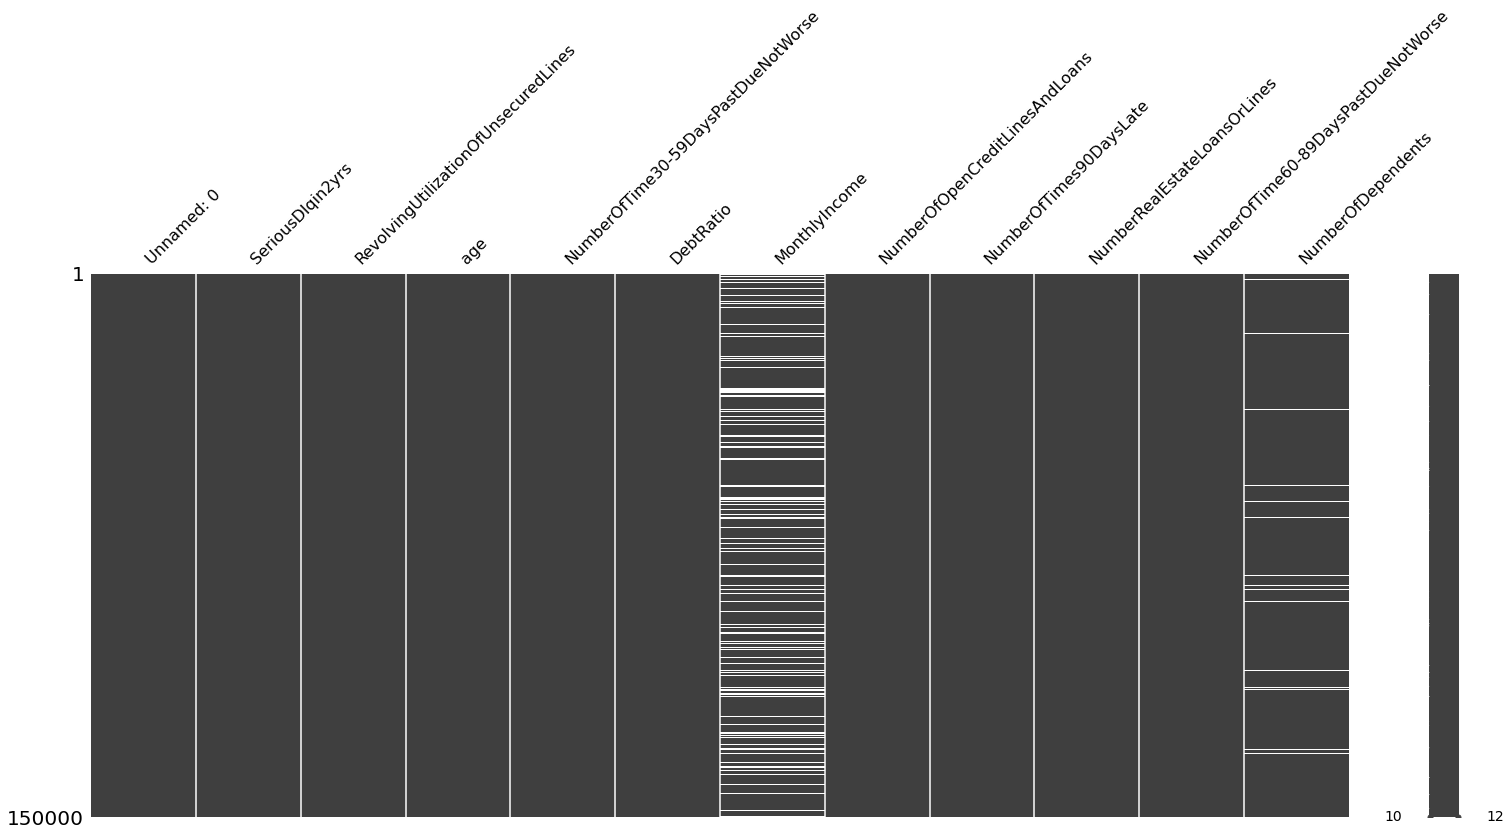

In [9]:
import missingno as msno
msno.matrix(train)

Looks like MonthlyIncome has a lot of NaN and i'm not sure why

In [10]:
print(f"Percentage of NaN - Monthly Income: {train.loc[train['MonthlyIncome'].isnull()].shape[0]/train.shape[0]}")

print(f"Percentage of NaN - Number of dependents: {train.loc[train['NumberOfDependents'].isnull()].shape[0]/train.shape[0]}")

Percentage of NaN - Monthly Income: 0.19820666666666667
Percentage of NaN - Number of dependents: 0.02616


# Data Cleaning

In [11]:
import seaborn as sns

train.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


## Unnamed: 0

In [24]:
train['Unnamed: 0'].head(10)

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: Unnamed: 0, dtype: int64

It's just an id column, which is useless for us

In [27]:
train.drop('Unnamed: 0', axis=1, inplace=True)

## Age

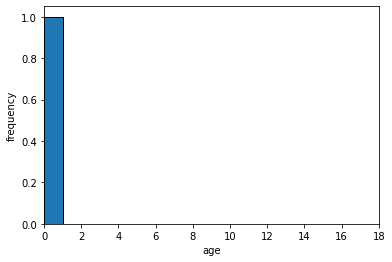

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

ages = train['age']

bins = np.linspace(0, 18, 19)

plt.hist(ages, bins=bins, edgecolor='black')
plt.xlabel('age')
plt.ylabel('frequency')
plt.xlim(0, 18)
plt.show()

In [22]:
print(test['age'].describe())
print('\n\n',test[test['age'] != 0]['age'].describe())

count    101503.000000
mean         52.405436
std          14.779756
min          21.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         104.000000
Name: age, dtype: float64


 count    101503.000000
mean         52.405436
std          14.779756
min          21.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         104.000000
Name: age, dtype: float64


Looks like the min age is 21 but the max age is unsure. So, that only 0 is an outlier, which i decided to imput as mean, since the age is not that skewed

In [14]:
# Imputing mean since data is not that skewed (age == 0 only happened once)
train.loc[train['age'] == 0,'age'] = train['age'].mean()